In [ ]:
conda install -c conda-forge mlxtend

In [1]:
import os
import pandas as pd
import nltk
import numpy as np
import collections
import random
import re
import matplotlib.pyplot as plt
from scipy.io import loadmat
from mlxtend.plotting import plot_decision_regions
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from enum import Enum, auto
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import RegexpTokenizer
from unicodedata import normalize
from sklearn.feature_extraction.text import CountVectorizer
from itertools import product

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

In [31]:
def readRootDir(file):
    try:
        with open(file, 'r') as f:
            rootDir = f.read()
            rootDir = rootDir[:-1] if rootDir.endswith("\n") else rootDir
            return rootDir if rootDir.endswith('/') else rootDir + '/'
        return None
    except Exception as e:
        print(e)
        return None

def plotData(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=80, c='r', marker='x', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=80, c='b', marker='o', linewidths=1)

In [4]:
FILE_WITH_PATH_BASE = 'pathBase.txt'
PATH_BASE = readRootDir(FILE_WITH_PATH_BASE)

In [32]:
train = loadmat(PATH_BASE + 'spamTrain.mat')

xtrain = train['X']
ytrain = train['y']

print('X:', xtrain.shape)
print('y:', ytrain.shape)

X: (4000, 1899)
y: (4000, 1)


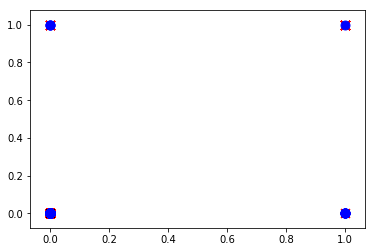

In [6]:
plotData(xtrain, ytrain)

numpy.ravel(a) - A 1-D array, containing the elements of the input, is returned.

In [93]:
def classificadorSVM(kernel, xtrain, ytrain):
    print("Kernel: " + kernel)
    if kernel == 'linear':
        classifier = svm.SVC(kernel=kernel)        
    else:
        classifier = svm.SVC(kernel=kernel, gamma='auto')
        
    classifier.fit(xtrain, ytrain.ravel())

    test = loadmat(PATH_BASE + 'spamTest.mat')
    xtest = test['Xtest']
    ytest = test['ytest'].ravel()

    prediction = classifier.predict(xtest)
    print(classification_report(ytest, prediction))

In [95]:
classificadorSVM('linear', xtrain, ytrain)

Kernel: linear
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       692
           1       0.96      0.97      0.96       308

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.98      0.98      0.98      1000



In [96]:
classificadorSVM('poly', xtrain, ytrain)

Kernel: poly
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       692
           1       0.00      0.00      0.00       308

   micro avg       0.69      0.69      0.69      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.48      0.69      0.57      1000



/home/yulli/anaconda2/envs/envPython3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
classificadorSVM('rbf', xtrain, ytrain)

Kernel: rbf
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       692
           1       0.98      0.87      0.92       308

   micro avg       0.95      0.95      0.95      1000
   macro avg       0.96      0.93      0.94      1000
weighted avg       0.95      0.95      0.95      1000



In [98]:
classificadorSVM('sigmoid', xtrain, ytrain)

Kernel: sigmoid
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       692
           1       0.97      0.80      0.88       308

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.94      0.90      0.91      1000
weighted avg       0.93      0.93      0.93      1000

